In [ ]:
import pandas as pd                    # For analysing the data
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt        # For plotting graphs
%matplotlib inline
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")


In [ ]:
# Load the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read the CSV file
train = pd.read_csv('/content/drive/MyDrive/loan.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
test = pd.read_csv('/content/drive/MyDrive/dba_projectfiles_march23_datafiels.zip (Unzipped Files)/loan_prediction_test.csv')
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
train_original = train.copy()
test_original = test.copy()

In [ ]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
train.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [ ]:
test.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,int64
LoanAmount,float64
Loan_Amount_Term,float64


In [ ]:
train['Credit_History'].unique()

array([ 1.,  0., nan])

In [ ]:
train['Credit_History'] = train['Credit_History'].astype(object)

In [ ]:
test['Credit_History'].unique()

array([ 1., nan,  0.])

In [ ]:
test['Credit_History'] = test['Credit_History'].astype(object)

In [ ]:
train.shape, test.shape

((614, 13), (367, 12))

In [ ]:
train['Loan_Status'].value_counts()

,count
Loan_Status,
Y,422
N,192


In [ ]:
train['Loan_Status'].value_counts(normalize=True)

,proportion
Loan_Status,
Y,0.687296
N,0.312704


<Axes: xlabel='Loan_Status'>

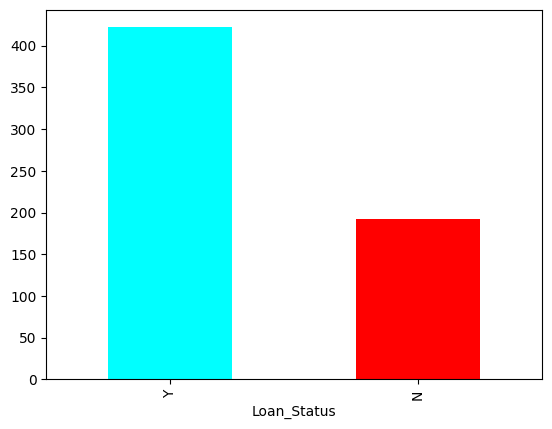

In [ ]:
train['Loan_Status'].value_counts().plot.bar(color=['cyan','red'])

<Axes: title={'center': 'Credit_History'}, xlabel='Credit_History'>

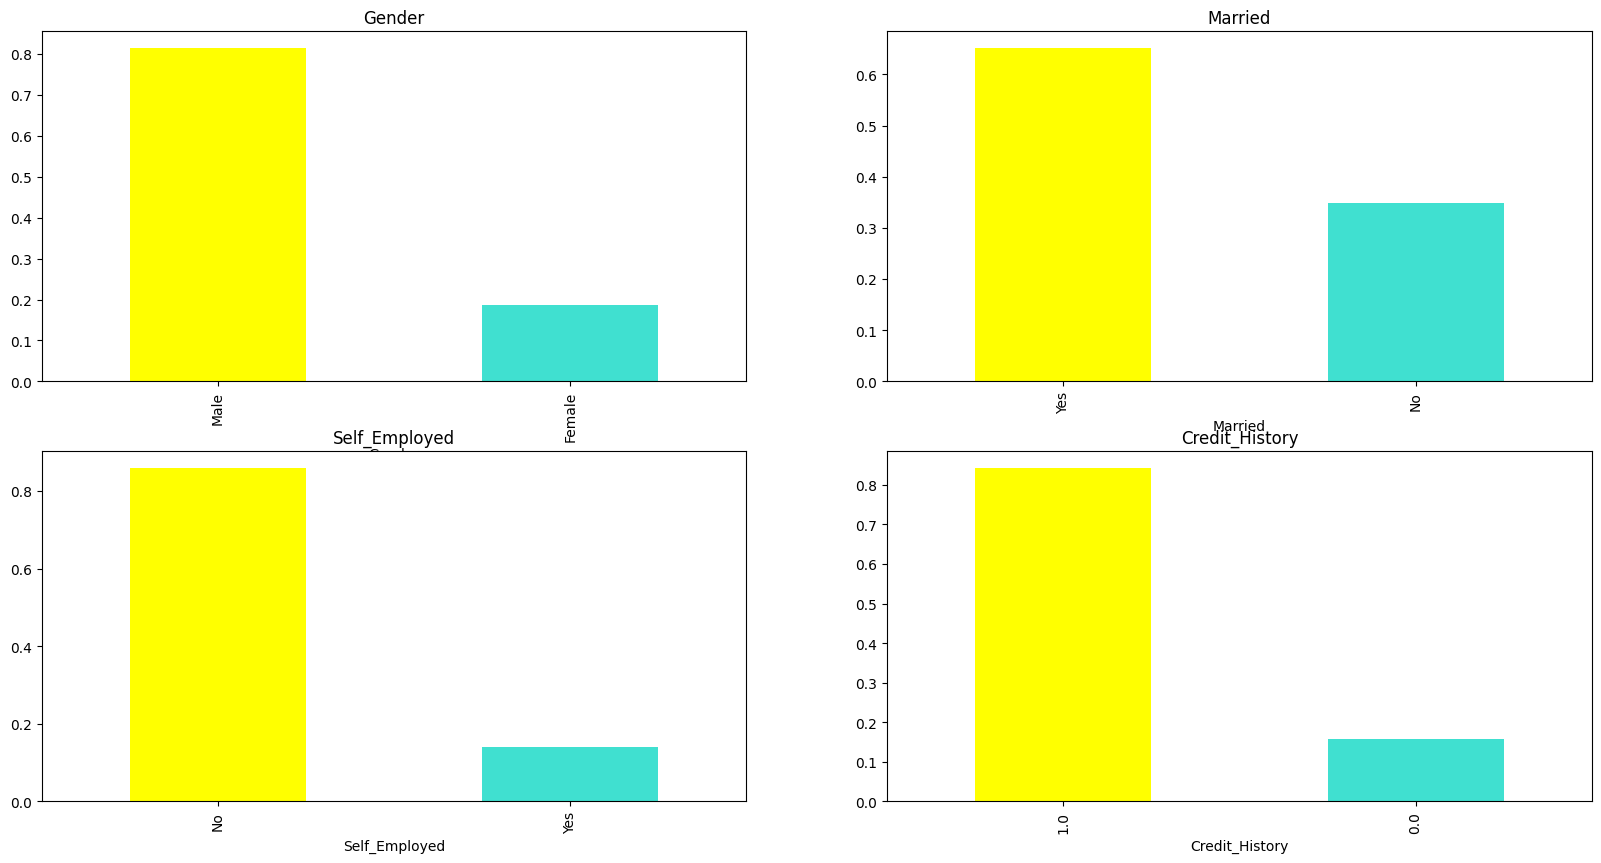

In [ ]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender',color=['yellow','turquoise'])

plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Married',color=['yellow','turquoise'])

plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Self_Employed',color=['yellow','turquoise'])

plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Credit_History',color=['yellow','turquoise'])

<Axes: title={'center': 'Property_Area'}, xlabel='Property_Area'>

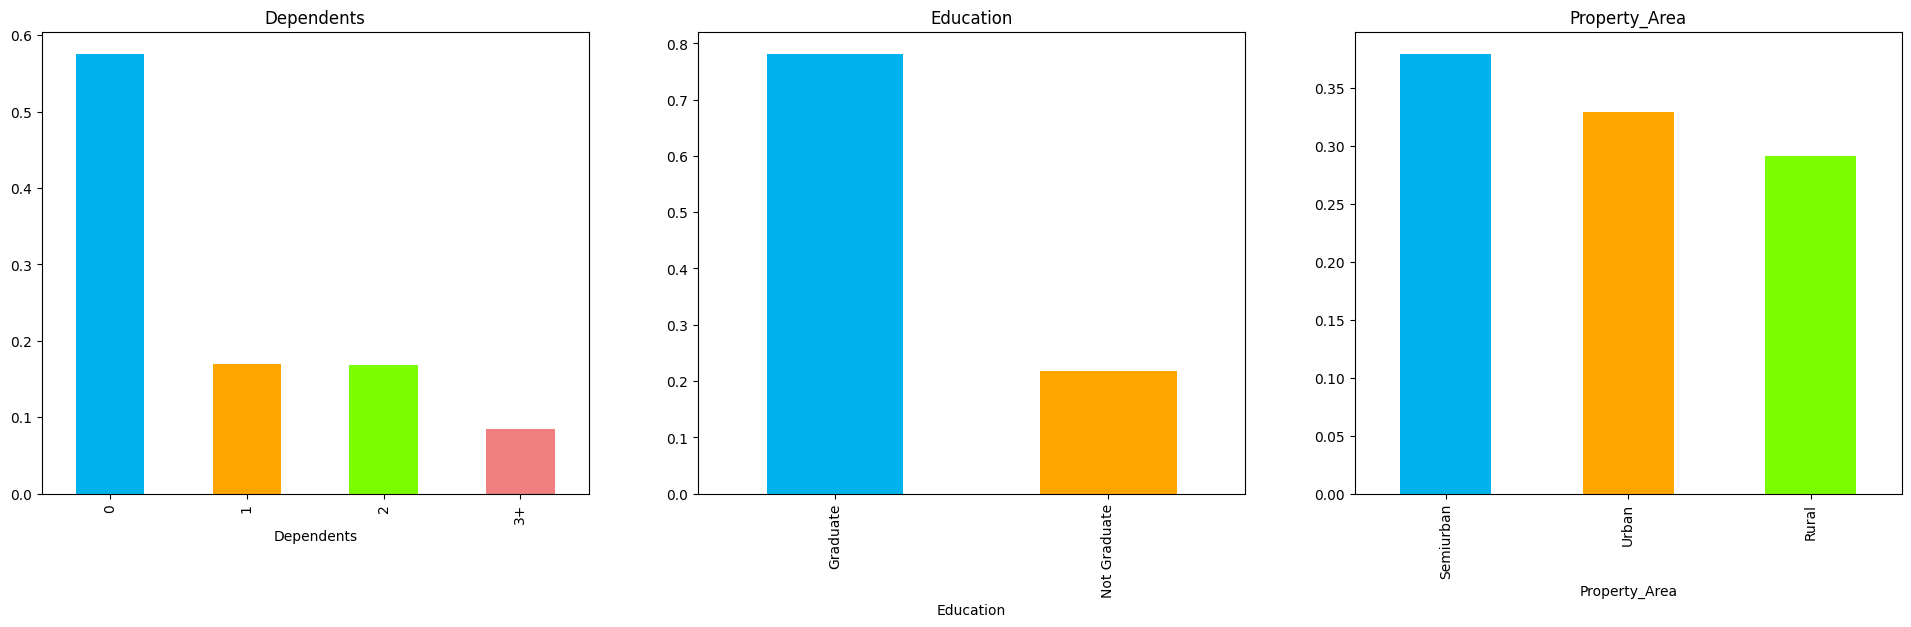

In [ ]:
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Dependents',color=['#00B2EE','orange','lawngreen','lightcoral'])

plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Education',color=['#00B2EE','orange'])

plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Property_Area',color=['#00B2EE','orange','lawngreen'])

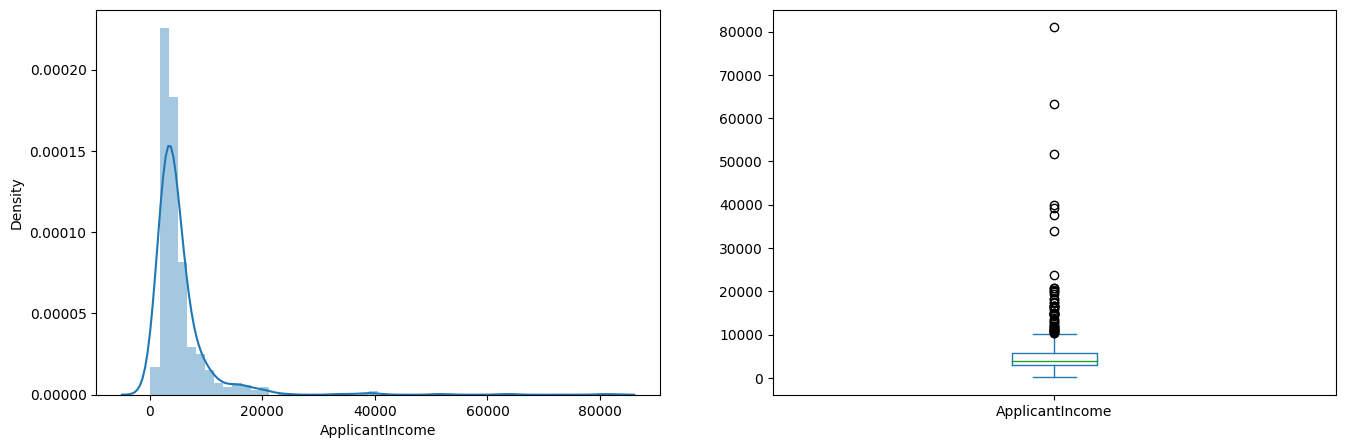

In [ ]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome']);

plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

Text(0.5, 0.98, '')

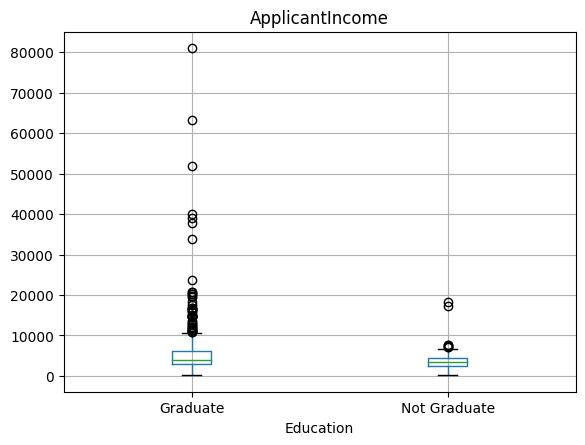

In [ ]:
train.boxplot(column='ApplicantIncome', by ='Education')
plt.suptitle('')

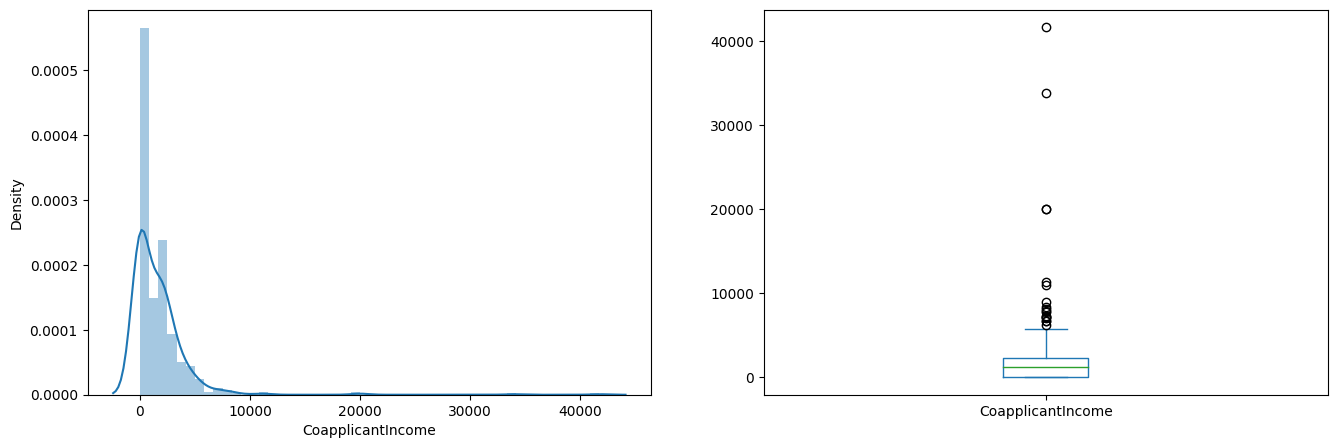

In [ ]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])

plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show()

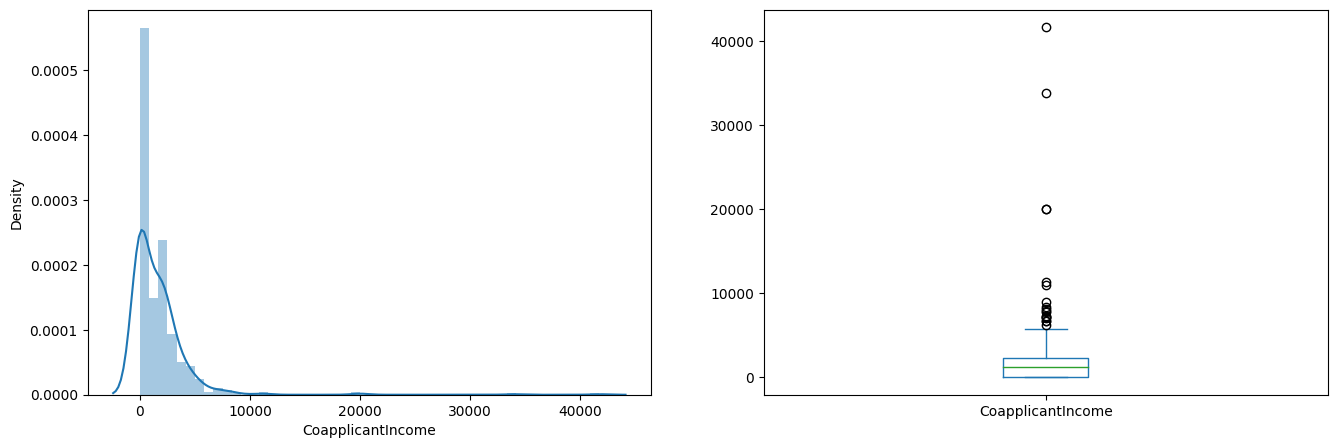

In [ ]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])

plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show()

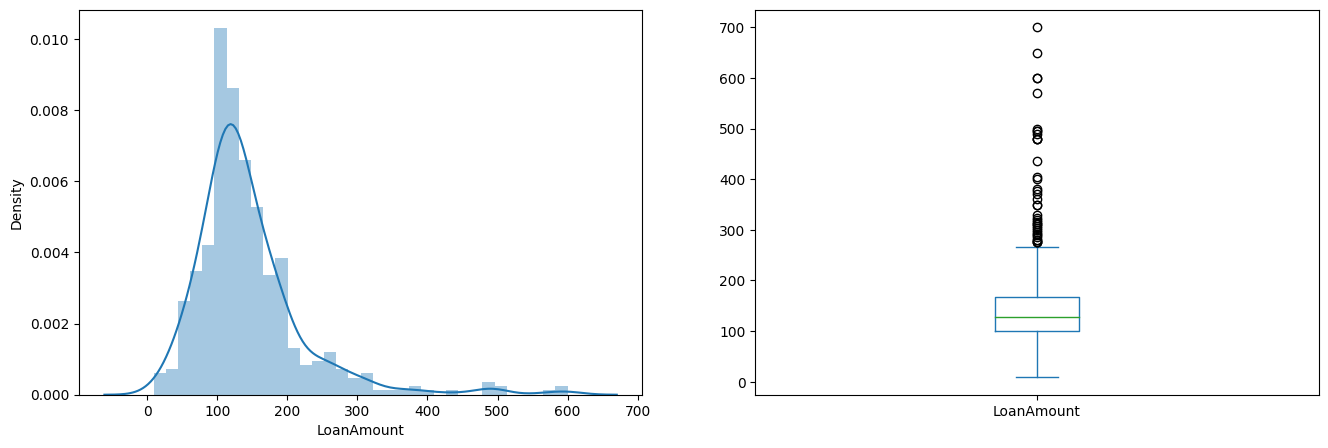

In [ ]:
plt.figure(1)
plt.subplot(121)
df = train.dropna()
sns.distplot(df['LoanAmount']);

plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    object 
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 62.5+ KB


In [ ]:
train.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    object 
 11  Property_Area      367 non-null    object 
dtypes: float64(2), int64(2), object(8)
memory usage: 37.3+ KB


In [ ]:
test.isnull().sum()

,0
Loan_ID,0
Gender,11
Married,0
Dependents,10
Education,0
Self_Employed,23
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,5
Loan_Amount_Term,6


In [ ]:
value_counts = train['Gender'].value_counts(normalize=True)
value_counts

,proportion
Gender,
Male,0.813644
Female,0.186356


In [ ]:
import random

In [ ]:
train['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [ ]:
random_gender = random.choice(['Male', 'Female'])

In [ ]:
train["Gender"] = train["Gender"].fillna(pd.Series(random_gender,index=train.index))

In [ ]:
train['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
random_employed = random.choice(['No', 'Yes'])

In [ ]:
train["Self_Employed"] = train["Self_Employed"].fillna(pd.Series(random_employed,index=train.index))

In [ ]:
train['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
random_married = random.choice(['Yes', 'No'])

In [ ]:
train["Married"] = train["Married"].fillna(pd.Series(random_married,index=train.index))

In [ ]:
train['Credit_History'].unique()

array([1.0, 0.0, nan], dtype=object)

In [ ]:
random_credith = random.choice([1.0, 0.0])

In [ ]:
train["Credit_History"] = train["Credit_History"].fillna(pd.Series(random_credith,index=train.index))

In [ ]:
train['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [ ]:
train['Dependents'] = train['Dependents'].replace('3+', 3).astype(object)

In [ ]:
random_dependents = random.choice([0,1,2,3])

In [ ]:
train['Dependents'] = train['Dependents'].fillna(pd.Series(random_dependents,index=train.index))

In [ ]:
train.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
train['Loan_Amount_Term'].value_counts()

,count
Loan_Amount_Term,
360.0,512
180.0,44
480.0,15
300.0,13
240.0,4
84.0,4
120.0,3
60.0,2
36.0,2


In [ ]:
train['Loan_Amount_Term'].mean()

342.0

In [ ]:
train['Loan_Amount_Term'].median()

360.0

In [ ]:
train['Loan_Amount_Term'].mode()

,Loan_Amount_Term
0,360.0


In [ ]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

In [ ]:
train['LoanAmount'].mean()

146.41216216216216

In [ ]:
train['LoanAmount'].median()

128.0

In [ ]:
train['LoanAmount'].mode()

,LoanAmount
0,120.0


In [ ]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [ ]:
train.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
test.isnull().sum()

,0
Loan_ID,0
Gender,11
Married,0
Dependents,10
Education,0
Self_Employed,23
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,5
Loan_Amount_Term,6


In [ ]:
test['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [ ]:
random_genderT = random.choice(['Yes', 'No'])

In [ ]:
test["Gender"] = test["Gender"].fillna(pd.Series(random_genderT,index=test.index))

In [ ]:
test['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [ ]:
test['Dependents'] = test['Dependents'].replace('3+', 3).astype(object)

In [ ]:
random_dependentsT = random.choice([0,1,2,3])

In [ ]:
test["Dependents"] = test["Dependents"].fillna(pd.Series(random_dependentsT,index=test.index))

In [ ]:
test['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
random_employedT = random.choice(['No', 'Yes'])

In [ ]:
test["Self_Employed"] = test["Self_Employed"].fillna(pd.Series(random_employedT,index=test.index))

In [ ]:
test['Credit_History'].unique()

array([1.0, nan, 0.0], dtype=object)

In [ ]:
random_creditT = random.choice([1.0, 0.0])

In [ ]:
test["Credit_History"] = test["Credit_History"].fillna(pd.Series(random_creditT,index=test.index))

In [ ]:
test['LoanAmount'].mean()

136.13259668508286

In [ ]:
test['LoanAmount'].median()

125.0

In [ ]:
test['LoanAmount'].mode()

,LoanAmount
0,150.0


In [ ]:
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)

In [ ]:
test['Loan_Amount_Term'].mean()

342.53739612188366

In [ ]:
test['Loan_Amount_Term'].median()

360.0

In [ ]:
test['Loan_Amount_Term'].mode()

,Loan_Amount_Term
0,360.0


In [ ]:
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)

In [ ]:
test.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
from scipy.stats import boxcox

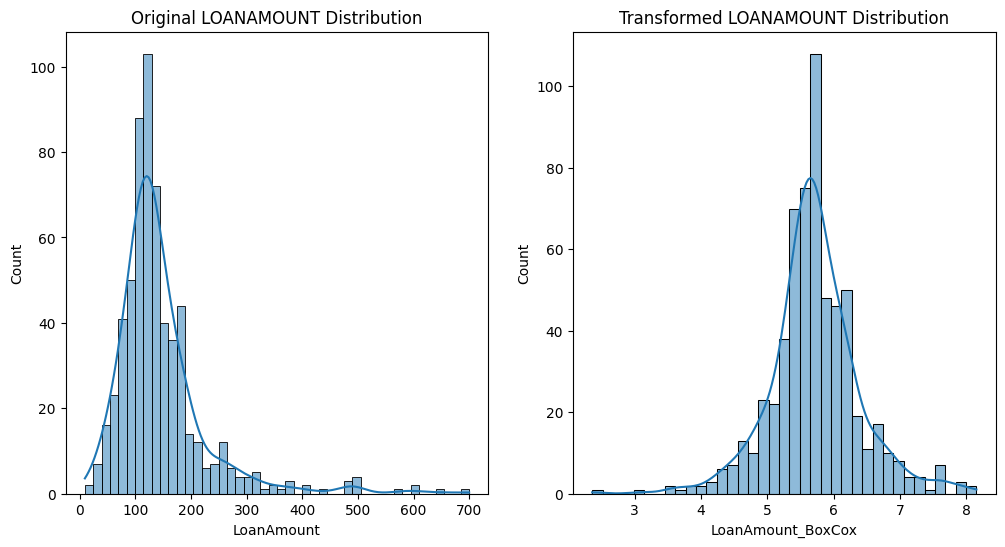

Optimal lambda: 0.06455377022904334


In [ ]:
# Perform Box-Cox transformation on the DataFrame (df)
transformed_data, best_lambda = boxcox(train['LoanAmount'])

# Add the transformed data back to the DataFrame
train['LoanAmount_BoxCox'] = transformed_data

# Plot the original and transformed data distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(train['LoanAmount'], kde=True, ax=axes[0]) # Use df here
axes[0].set_title('Original LOANAMOUNT Distribution')

sns.histplot(train['LoanAmount_BoxCox'], kde=True, ax=axes[1]) # Use df here
axes[1].set_title('Transformed LOANAMOUNT Distribution')

plt.show()

# Display the optimal lambda value
print(f'Optimal lambda: {best_lambda}')

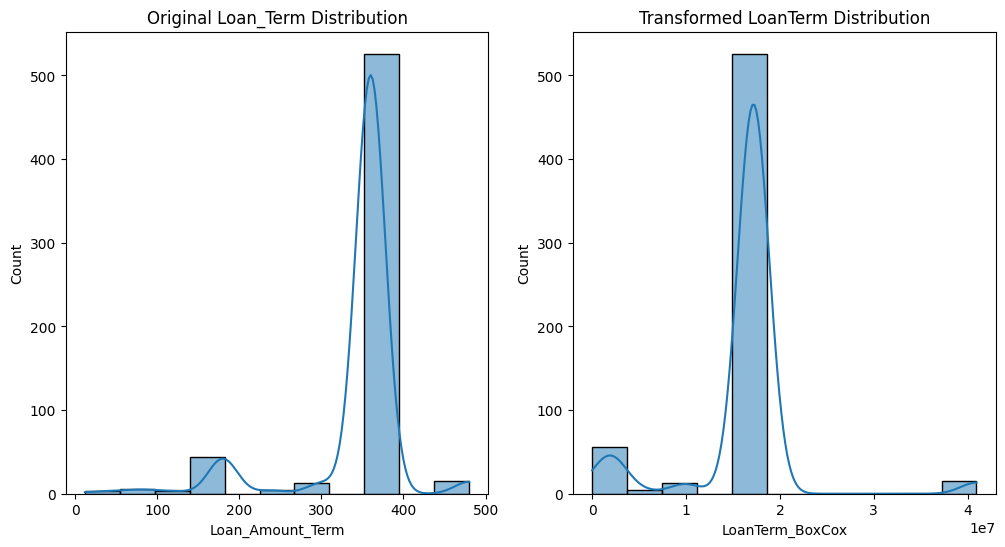

Optimal lambda: 3.0179203764530107


In [ ]:
# Perform Box-Cox transformation on the DataFrame (df)
transformed_data, best_lambda = boxcox(train['Loan_Amount_Term'])

# Add the transformed data back to the DataFrame
train['LoanTerm_BoxCox'] = transformed_data

# Plot the original and transformed data distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(train['Loan_Amount_Term'], kde=True, ax=axes[0]) # Use df here
axes[0].set_title('Original Loan_Term Distribution')

sns.histplot(train['LoanTerm_BoxCox'], kde=True, ax=axes[1]) # Use df here
axes[1].set_title('Transformed LoanTerm Distribution')

plt.show()

# Display the optimal lambda value
print(f'Optimal lambda: {best_lambda}')

In [ ]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']

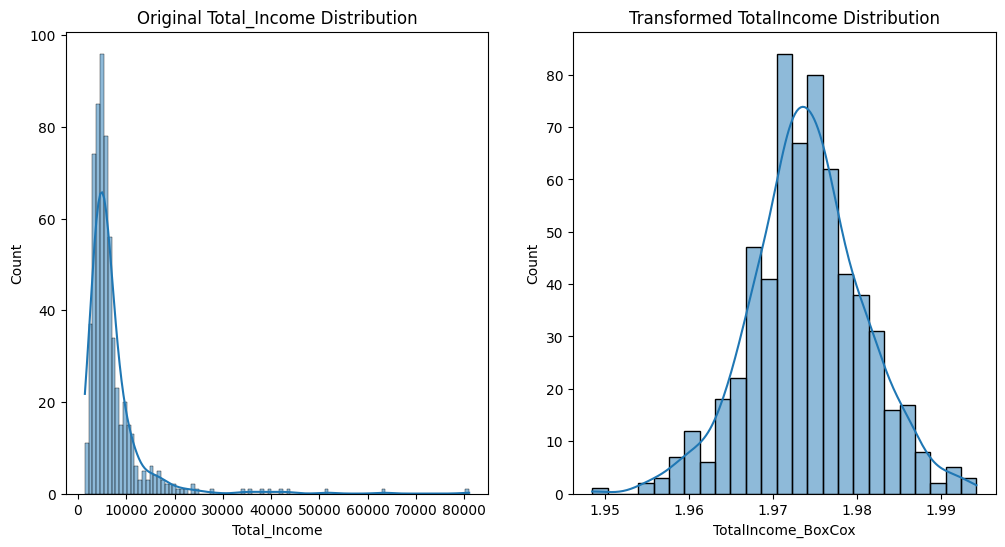

In [ ]:
# Perform Box-Cox transformation on the DataFrame (df)
transformed_data, best_lambda = boxcox(train['Total_Income'])

# Add the transformed data back to the DataFrame
train['TotalIncome_BoxCox'] = transformed_data

# Plot the original and transformed data distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(train['Total_Income'], kde=True, ax=axes[0]) # Use df here
axes[0].set_title('Original Total_Income Distribution')

sns.histplot(train['TotalIncome_BoxCox'], kde=True, ax=axes[1]) # Use df here
axes[1].set_title('Transformed TotalIncome Distribution')

plt.show()

# Display the optimal lambda value
print(f'Optimal lambda: {best_lambda}')

In [ ]:
train.head()

Optimal lambda: -0.4996747762666783


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_BoxCox,LoanTerm_BoxCox,Total_Income,TotalIncome_BoxCox
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5.697856,1.717946e+07,5849.0,1.975060
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,5.697856,1.717946e+07,6091.0,1.975586
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.810944,1.717946e+07,3000.0,1.964668
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,5.609763,1.717946e+07,4941.0,1.972752
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,5.830579,1.717946e+07,6000.0,1.975392


In [ ]:
from sklearn.preprocessing import LabelEncoder
col = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()

for i in col:
    train[i] = le.fit_transform(train[i])

In [ ]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_BoxCox,LoanTerm_BoxCox,Total_Income,TotalIncome_BoxCox
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1,5.697856,1.717946e+07,5849.0,1.975060
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,5.697856,1.717946e+07,6091.0,1.975586
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,4.810944,1.717946e+07,3000.0,1.964668
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,5.609763,1.717946e+07,4941.0,1.972752
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,5.830579,1.717946e+07,6000.0,1.975392


In [ ]:
# Defining the column names for droping
train = train.drop(['Loan_ID','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_Income'],axis=1)

In [ ]:
train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area', 'Loan_Status', 'LoanAmount_BoxCox',
       'LoanTerm_BoxCox', 'TotalIncome_BoxCox'],
      dtype='object')

In [ ]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_BoxCox,LoanTerm_BoxCox,TotalIncome_BoxCox
0,1,0,0,0,0,1.0,2,1,5.697856,1.717946e+07,1.975060
1,1,1,1,0,0,1.0,0,0,5.697856,1.717946e+07,1.975586
2,1,1,0,0,1,1.0,2,1,4.810944,1.717946e+07,1.964668
3,1,1,0,1,0,1.0,2,1,5.609763,1.717946e+07,1.972752
4,1,0,0,0,0,1.0,2,1,5.830579,1.717946e+07,1.975392


In [ ]:
columns_to_round = ['LoanAmount_BoxCox']
train = round_columns(train, columns_to_round)

NameError: name 'round_columns' is not defined

In [ ]:
def round_column(train, column_name):
    """
    Rounds the values in a specified column of a dataframe to 2 decimal places.

    Parameters:
        df (pandas.DataFrame): The dataframe to operate on.
        column_name (str): The name of the column to round.

    Returns:
        pandas.DataFrame: The modified dataframe with the rounded column.
    """
    train[column_name] = train[column_name].round(1)
    return train

In [ ]:
round_column(train, 'LoanTerm_BoxCox')

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_BoxCox,LoanTerm_BoxCox,TotalIncome_BoxCox
0,1,0,0,0,0,1.0,2,1,5.697856,17179464.4,1.975060
1,1,1,1,0,0,1.0,0,0,5.697856,17179464.4,1.975586
2,1,1,0,0,1,1.0,2,1,4.810944,17179464.4,1.964668
3,1,1,0,1,0,1.0,2,1,5.609763,17179464.4,1.972752
4,1,0,0,0,0,1.0,2,1,5.830579,17179464.4,1.975392
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1.0,0,1,4.906874,17179464.4,1.964042
610,1,1,3,0,0,1.0,0,1,4.165140,2120923.5,1.969985
611,1,1,1,0,0,1.0,2,1,6.650632,17179464.4,1.979286
612,1,1,2,0,0,1.0,2,1,6.222763,17179464.4,1.978253


In [ ]:
round_column(train, 'TotalIncome_BoxCox')

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_BoxCox,LoanTerm_BoxCox,TotalIncome_BoxCox
0,1,0,0,0,0,1.0,2,1,5.697856,17179464.4,2.0
1,1,1,1,0,0,1.0,0,0,5.697856,17179464.4,2.0
2,1,1,0,0,1,1.0,2,1,4.810944,17179464.4,2.0
3,1,1,0,1,0,1.0,2,1,5.609763,17179464.4,2.0
4,1,0,0,0,0,1.0,2,1,5.830579,17179464.4,2.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1.0,0,1,4.906874,17179464.4,2.0
610,1,1,3,0,0,1.0,0,1,4.165140,2120923.5,2.0
611,1,1,1,0,0,1.0,2,1,6.650632,17179464.4,2.0
612,1,1,2,0,0,1.0,2,1,6.222763,17179464.4,2.0


In [ ]:
round_column(train, 'LoanAmount_BoxCox')

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_BoxCox,LoanTerm_BoxCox,TotalIncome_BoxCox
0,1,0,0,0,0,1.0,2,1,5.7,1.7,2.0
1,1,1,1,0,0,1.0,0,0,5.7,1.7,2.0
2,1,1,0,0,1,1.0,2,1,4.8,1.7,2.0
3,1,1,0,1,0,1.0,2,1,5.6,1.7,2.0
4,1,0,0,0,0,1.0,2,1,5.8,1.7,2.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1.0,0,1,4.9,1.7,2.0
610,1,1,3,0,0,1.0,0,1,4.2,0.2,2.0
611,1,1,1,0,0,1.0,2,1,6.7,1.7,2.0
612,1,1,2,0,0,1.0,2,1,6.2,1.7,2.0


In [ ]:
import pandas as pd

# assume 'train' is your dataframe and 'LoanTerm_BoxCox' is the column with scientific notation values

train['LoanTerm_BoxCox'] = train['LoanTerm_BoxCox'].apply(lambda x: round(x / 1e7, 1))

In [ ]:
train.tail(50)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_BoxCox,LoanTerm_BoxCox,TotalIncome_BoxCox
564,1,1,2,0,0,0.0,2,0,6.7,1.7,2.0
565,1,1,0,1,0,0.0,0,1,5.6,1.7,2.0
566,1,0,0,0,0,1.0,2,1,4.9,1.7,2.0
567,1,1,3,0,0,0.0,0,0,5.6,1.7,2.0
568,0,0,0,0,0,1.0,2,0,2.4,1.7,2.0
569,1,1,0,0,0,0.0,2,0,5.4,1.7,2.0
570,1,1,1,0,0,1.0,2,1,6.2,1.7,2.0
571,1,1,1,0,0,0.0,2,0,6.0,1.7,2.0
572,1,1,2,0,0,1.0,2,1,6.8,1.7,2.0
573,1,1,2,1,0,1.0,1,0,6.2,4.1,2.0


In [ ]:
# Fit the  model with all predictor on logistic regression
from sklearn.linear_model import LogisticRegression
model_1 = LogisticRegression()


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# assume 'df' is your dataframe with the feature columns and the target variable

X = train.drop('Loan_Status', axis=1)  # feature columns
y = train['Loan_Status']  # target variable

# create a logistic regression model
model_1 = LogisticRegression()

# fit the model to the entire dataset (100% of the data)
model_1.fit(X, y)


LogisticRegression()

In [ ]:
model_1.fit(X, y)

LogisticRegression()

In [ ]:
# Odds Ratio
np.exp(model_1.coef_[0]) # Access the coefficients for class 0

array([0.90081396, 1.73803363, 0.97232188, 0.70860587, 0.99982808,
       7.87614928, 1.10781026, 0.86174988, 0.84363702, 1.05527952])

In [ ]:
train.dtypes

,0
Gender,int64
Married,int64
Dependents,object
Education,int64
Self_Employed,int64
Credit_History,float64
Property_Area,int64
Loan_Status,int64
LoanAmount_BoxCox,float64
LoanTerm_BoxCox,float64


In [ ]:
X_test = train.iloc[:, list(range(7)) + [8, 9, 10]]
probs1=model_1.predict(X_test)
probs1

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,

In [ ]:
# predicted class of test set
y_pred1=np.where(probs1>0.5,1,0)  # Default prob cut-off=0.5
y_pred1

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,

In [ ]:
X_test

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmount_BoxCox,LoanTerm_BoxCox,TotalIncome_BoxCox
0,1,0,0,0,0,1.0,2,5.7,1.7,2.0
1,1,1,1,0,0,1.0,0,5.7,1.7,2.0
2,1,1,0,0,1,1.0,2,4.8,1.7,2.0
3,1,1,0,1,0,1.0,2,5.6,1.7,2.0
4,1,0,0,0,0,1.0,2,5.8,1.7,2.0
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1.0,0,4.9,1.7,2.0
610,1,1,3,0,0,1.0,0,4.2,0.2,2.0
611,1,1,1,0,0,1.0,2,6.7,1.7,2.0
612,1,1,2,0,0,1.0,2,6.2,1.7,2.0


In [ ]:
# predicted class of test set
y_pred1=np.where(probs1>0.5,1,0)  # Default prob cut-off=0.5
y_pred1

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,

In [ ]:
# performance of the model
# overall accuracy of the model
np.mean(train.Loan_Status==y_pred1)

0.7703583061889251

In [ ]:
# confusion matrix
pd.crosstab(train.Loan_Status,y_pred1,rownames=['Actual'],colnames=['Predicted'])

Predicted,0,1
Actual,,
0,95,97
1,44,378


In [ ]:
from sklearn.metrics import roc_curve, auc
# test_auc
# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(train.Loan_Status, probs1)
roc_auc = auc(fpr, tpr)
roc_auc
# To draw a ROC curve, only the true positive rate (TPR) and false positive rate (FPR)
# are needed (as functions of some classifier parameter). ... Since TPR is equivalent
# to sensitivity and FPR is equal to 1 − specificity, the ROC graph is sometimes called
# the sensitivity vs (1 − specificity) plot
#In general, an AUC of 0.5 suggests no discrimination (i.e., ability to diagnose patients
# with and without the disease or condition based on the test), 0.7 to 0.8 is considered
# acceptable, 0.8 to 0.9 is considered excellent, and more than 0.9 is considered outstanding

0.6952631319115323

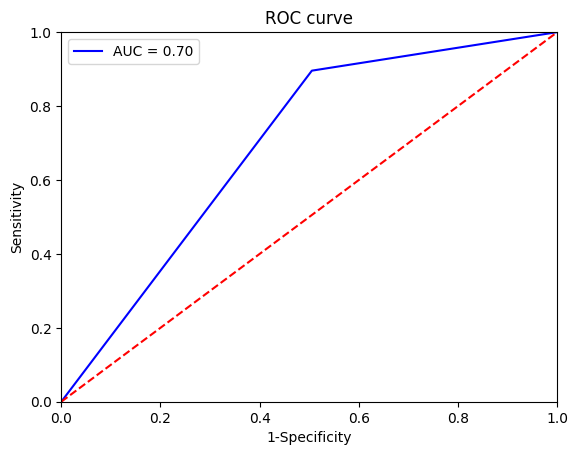

In [ ]:
# Plot ROC curve
plt.title('ROC curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'best')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Sensitivity')
plt.xlabel('1-Specificity')
plt.show()
#The ROC curve shows the trade-off between sensitivity (or TPR)
# and specificity (1 – FPR). Classifiers that give curves closer to
# the top-left corner indicate a better performance. ... The closer
# the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.